![](https://i.ytimg.com/vi/pJt6erSOnm0/maxresdefault.jpg)

Hello there, I would like to show you a nice little thing Tensorflow has in this pocket : TensorBoard.

For those who don't know, this is tool that show you in real time how your Deep Learning model, or models, perform in your browser. I found that very useful, you can have some nice dashboard. Moreover il you need to explain your model to your co_worker, non familiar with Deep Learnig or even Data Science, this is the perfect tool to explain quickly and efficiently. 

But before that, I will import some database and build my model, and after I will explain how to setup and use TensorBoard.

For now, I give you the link to TensorBoard : https://www.tensorflow.org/tensorboard/

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">&nbsp;Table of Contents:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">Import packages<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">Loading your own data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#3" role="tab" aria-controls="settings">First Deep Learning model<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#4" role="tab" aria-controls="settings"> Analysing model with TensorBoard<span class="badge badge-primary badge-pill">4</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings">Optimising model with TensorBoard<span class="badge badge-primary badge-pill">5</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings"> Make predictions with our model<span class="badge badge-primary badge-pill">6</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings">Conclusion<span class="badge badge-primary badge-pill">5</span></a> 
</div>

<a id="1"></a> <br>
## 1. Import packages

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
import tensorflow as tf

print(tf.__version__)

2.0.0


In [22]:
import matplotlib.pyplot as plt
import os
import cv2
#pip install opencv-python
from tqdm import tqdm
import numpy as np

<a id="2"></a> <br>
## 2. Loading your own data

First, we need a dataset,  let's grab the Dogs vs Cats dataset from Microsoft. I : https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [7]:
DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray') 
        plt.show()  

        break 
    break  

<Figure size 640x480 with 1 Axes>

Let's see the shape. 

In [8]:
print(img_array.shape)

(375, 500)


We definitely don't want the images that big, but also various images are different shapes, and this is also a problem. Let's modify that.

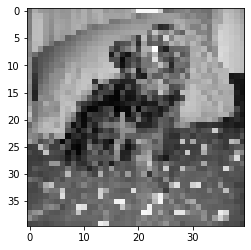

In [10]:
IMG_SIZE = 40

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


It's too much, let's search for the perfect IMG_SIZE.

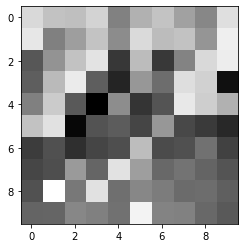

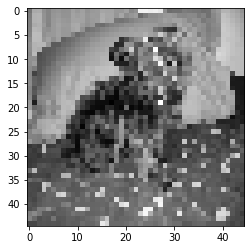

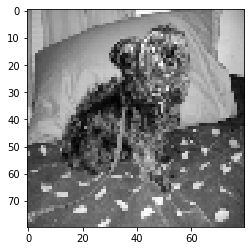

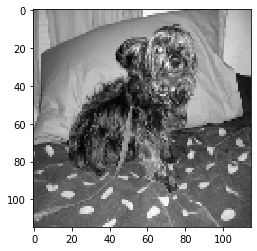

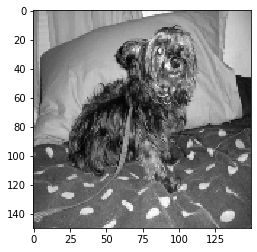

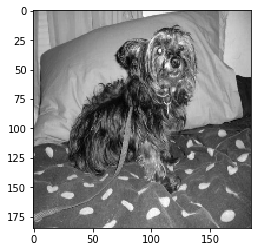

In [4]:
for i in np.arange(10,200,35):

    IMG_SIZE = i

    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')
    plt.show()

50 seems good.

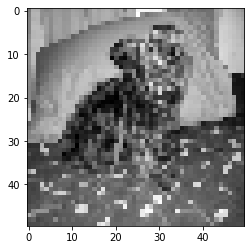

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


Now let's build our training data :

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:33<00:00, 377.90it/s]


24946


Next let's shuffle our data for good measure.

In [8]:
import random

random.shuffle(training_data)

Let's verify if it's nicely shuffled !

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
1
0
1
1
0


Yes it is ! 

In [10]:
IMG_SIZE = 50



X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[113]
   [112]
   [ 97]
   ...
   [ 46]
   [ 50]
   [ 45]]

  [[113]
   [112]
   [ 72]
   ...
   [ 46]
   [ 47]
   [ 43]]

  [[112]
   [110]
   [ 65]
   ...
   [ 51]
   [ 48]
   [ 48]]

  ...

  [[ 15]
   [ 12]
   [ 13]
   ...
   [ 79]
   [ 28]
   [ 25]]

  [[ 79]
   [ 51]
   [ 80]
   ...
   [ 45]
   [ 90]
   [ 53]]

  [[ 32]
   [ 21]
   [ 13]
   ...
   [ 48]
   [ 48]
   [ 20]]]]


Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model. For this, we can use pickle, if you don't know it : https://docs.python.org/3/library/pickle.html

In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

We can load it whatever and whenever we want, we just need the files in our folder !

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

It's time to make our model, if you don't know anything about Neural Network and Deep Learning, I strongly recommand this wonderful playlist by 3blue1brown : https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

It's really awesome how he can explain stuff so easily and yet so hard.

<a id="3"></a> <br>
## 3. First Deep Learning model

Time to make our Neural Network ! Let's import the packages needed.

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0 #VERY IMPORTANT STEPS

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, verbose = 2, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 - 340s - loss: 0.6467 - accuracy: 0.6242 - val_loss: 0.5987 - val_accuracy: 0.6921
Epoch 2/3
17462/17462 - 317s - loss: 0.5805 - accuracy: 0.6974 - val_loss: 0.5573 - val_accuracy: 0.7088
Epoch 3/3
17462/17462 - 307s - loss: 0.5316 - accuracy: 0.7343 - val_loss: 0.5174 - val_accuracy: 0.7515


<a id="4"></a> <br>
## 4. Analysing model with TensorBoard

Nice result for a first try ! Now let's talk about **TensorBoard** :)

First things first, let's import it.

In [32]:
from tensorflow.keras.callbacks import TensorBoard

The way that we use TensorBoard with Keras is via a Keras callback. If you want to check out all the Keras callbacks, here it is : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

Let's focus on TensorBoard, we want to make our TensorBoard callback object.

This will save the model's training data to logs/NAME, which can then be read by TensorBoard.

We can add it into our model by adding it to the .fit method, with callbacks, like :

In [ ]:
model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
           verbose = 2,
          callbacks = [tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME), histogram_freq=1, profile_batch = 100000000)])

You could also use : 

In [ ]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
callbacks = [tensorboard])

For me, this method doesn't work but maybe for you it will work. 

So let's put this all together now !

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Cats_vs_dogs-CNN" #you need to create this repository before running or you will encounter an error

#logdir = "logs\\model"

#https://github.com/tensorflow/tensorboard/issues/2819    help for directory

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )


import tensorflow as tf
#call = keras.callbacks.TensorBoard(log_dir=logdir)

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
           verbose = 2,
          #callbacks = [tensorboard])
          
          
          callbacks = [tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME), histogram_freq=1, profile_batch = 100000000)])

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 - 325s - loss: 0.6361 - accuracy: 0.6315 - val_loss: 0.5754 - val_accuracy: 0.7032
Epoch 2/3
17462/17462 - 318s - loss: 0.5525 - accuracy: 0.7220 - val_loss: 0.5268 - val_accuracy: 0.7400
Epoch 3/3
17462/17462 - 325s - loss: 0.5042 - accuracy: 0.7495 - val_loss: 0.4827 - val_accuracy: 0.7652


After having run this, you should have a new directory called logs. We can visualize the initial results from this directory using tensorboard now. Open a console, change to your working directory, and type: tensorboard --logdir=logs/. You should see a notice like: TensorBoard 1.10.0 at http://H-PC:6006 (Press CTRL+C to quit) where "h-pc" probably is whatever your machine's name is. Open a browser and head to this address. You should see something like:

![](https://pythonprogramming.net/static/images/machine-learning/tensorboard-basic.png)

Now we can see how our model did over time. We can also save it for later if we want to rerun it directly.

In [ ]:
model.save('firstmodel.model')

If you want to load it :

In [ ]:
model = tf.keras.models.load_model("firstmodel.model")

<a id="5"></a> <br>
## 5. Optimising model with TensorBoard

So, previously we introduce TensorBoard, which is an application that we can use to visualize our model's training stats over time. In this tutorial, we're going to continue on that to exemplify how you might build a workflow to optimize your model's architecture.

To begin, let's think of a few things we could do to this model that we'd like to know.

The most basic things for us to modify are layers and nodes per layer, as well as 0, 1, or 2 dense layers. Let's test those things.

You could make more parameters, more variables, if fou wish, if you have the right computer, go for it but my computer isn't quite strong enough at the moment so those parameters will do the job for me :)

In [19]:
import time

dense_layers = [0,1]
layer_sizes = [16,32]
conv_layers = [1,2]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-node-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

1-conv-16-node-0-dense-1597328764
2-conv-16-node-0-dense-1597328764
1-conv-32-node-0-dense-1597328764
2-conv-32-node-0-dense-1597328764
1-conv-16-node-1-dense-1597328764
2-conv-16-node-1-dense-1597328764
1-conv-32-node-1-dense-1597328764
2-conv-32-node-1-dense-1597328764


So let's build our model now.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


#https://github.com/ibab/tensorflow-wavenet/issues/255  solve directory problem

NAME = "Cats_vs_dogs-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0,1]
layer_sizes = [16,32]
conv_layers = [1,2]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            #tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      verbose = 2,
                      callbacks = [tf.keras.callbacks.TensorBoard(log_dir="logs\{}".format(NAME), histogram_freq=1, profile_batch = 100000000)])

1-conv-16-nodes-0-dense-1597329024
Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 - 11s - loss: 0.6272 - accuracy: 0.6461 - val_loss: 0.5825 - val_accuracy: 0.7006
Epoch 2/10
17462/17462 - 9s - loss: 0.5677 - accuracy: 0.7101 - val_loss: 0.5576 - val_accuracy: 0.7206
Epoch 3/10
17462/17462 - 10s - loss: 0.5401 - accuracy: 0.7330 - val_loss: 0.5418 - val_accuracy: 0.7306
Epoch 4/10
17462/17462 - 10s - loss: 0.5221 - accuracy: 0.7457 - val_loss: 0.5359 - val_accuracy: 0.7336
Epoch 5/10
17462/17462 - 11s - loss: 0.5062 - accuracy: 0.7564 - val_loss: 0.5279 - val_accuracy: 0.7406
Epoch 6/10
17462/17462 - 9s - loss: 0.4923 - accuracy: 0.7653 - val_loss: 0.5258 - val_accuracy: 0.7406
Epoch 7/10
17462/17462 - 9s - loss: 0.4804 - accuracy: 0.7753 - val_loss: 0.5230 - val_accuracy: 0.7495
Epoch 8/10
17462/17462 - 9s - loss: 0.4716 - accuracy: 0.7814 - val_loss: 0.5294 - val_accuracy: 0.7402
Epoch 9/10
17462/17462 - 9s - loss: 0.4611 - accuracy: 0.7856 - val_loss: 0.5233

Epoch 3/10
17462/17462 - 25s - loss: 0.5011 - accuracy: 0.7590 - val_loss: 0.4827 - val_accuracy: 0.7618
Epoch 4/10
17462/17462 - 24s - loss: 0.4690 - accuracy: 0.7798 - val_loss: 0.4719 - val_accuracy: 0.7708
Epoch 5/10
17462/17462 - 25s - loss: 0.4512 - accuracy: 0.7871 - val_loss: 0.4727 - val_accuracy: 0.7716
Epoch 6/10
17462/17462 - 26s - loss: 0.4278 - accuracy: 0.8010 - val_loss: 0.4672 - val_accuracy: 0.7735
Epoch 7/10
17462/17462 - 26s - loss: 0.4121 - accuracy: 0.8130 - val_loss: 0.4505 - val_accuracy: 0.7851
Epoch 8/10
17462/17462 - 27s - loss: 0.3897 - accuracy: 0.8231 - val_loss: 0.4482 - val_accuracy: 0.7870
Epoch 9/10
17462/17462 - 28s - loss: 0.3716 - accuracy: 0.8318 - val_loss: 0.4398 - val_accuracy: 0.7950
Epoch 10/10
17462/17462 - 29s - loss: 0.3462 - accuracy: 0.8438 - val_loss: 0.4544 - val_accuracy: 0.7961


Even just toying with these parameters will take some significant time. We haven't even begun to touch other concepts like varying layer sizes, activation functions, learning rates, dropouts, and much much more.

Again, if you want to see which model perform better, go to your TensorBoard. First Open a console, change to your working directory, and type: tensorboard --logdir=logs/.

You should have something like this :

![](https://pythonprogramming.net/static/images/machine-learning/optimizing-models.png)

If you have a lot of model, you can filter or zoom to see which one perform the most eficiently.

For me, the best model is : 
- **dense_layers** = *1*
- **layer_sizes** = *32*
- **conv_layers** = *2*

So let's try that.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


#https://github.com/ibab/tensorflow-wavenet/issues/255  solve directory problem

NAME = "CNNopti"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [1]
layer_sizes = [32]
conv_layers = [2]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:


            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            #tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      verbose = 2,
                      callbacks = [tf.keras.callbacks.TensorBoard(log_dir="logs\{}".format(NAME), histogram_freq=1, profile_batch = 100000000)])

Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 - 27s - loss: 0.6350 - accuracy: 0.6286 - val_loss: 0.5928 - val_accuracy: 0.6916
Epoch 2/10
17462/17462 - 26s - loss: 0.5381 - accuracy: 0.7329 - val_loss: 0.5353 - val_accuracy: 0.7365
Epoch 3/10
17462/17462 - 25s - loss: 0.4900 - accuracy: 0.7657 - val_loss: 0.4926 - val_accuracy: 0.7635
Epoch 4/10
17462/17462 - 25s - loss: 0.4573 - accuracy: 0.7853 - val_loss: 0.4822 - val_accuracy: 0.7702
Epoch 5/10
17462/17462 - 25s - loss: 0.4258 - accuracy: 0.8039 - val_loss: 0.4718 - val_accuracy: 0.7759
Epoch 6/10
17462/17462 - 29s - loss: 0.3994 - accuracy: 0.8149 - val_loss: 0.4641 - val_accuracy: 0.7826
Epoch 7/10
17462/17462 - 30s - loss: 0.3684 - accuracy: 0.8344 - val_loss: 0.5039 - val_accuracy: 0.7710
Epoch 8/10
17462/17462 - 26s - loss: 0.3401 - accuracy: 0.8504 - val_loss: 0.4893 - val_accuracy: 0.7811
Epoch 9/10
17462/17462 - 26s - loss: 0.3083 - accuracy: 0.8653 - val_loss: 0.4999 - val_accuracy: 0.7778
Epoch 

As usual, we save our best model with pickle.

In [33]:
model.save('CNNopti.model')

INFO:tensorflow:Assets written to: CNNopti.model\assets


So now, let's see how our model predict well !

<a id="6"></a> <br>
## 6. Make predictions with our model

First, we some images. I am going to use a couple of images that I know to be unique.
You can also go to google images and grab some there too. That said, there's a high chance the images from google images are contained in the dataset we used, so, if you have some unique ones, use those.

What were the things we did to our training images? We grayscaled, resized, and reshaped. Let's create a function that does all of that.

In [19]:
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Next, we want to load our model :

In [44]:
model = tf.keras.models.load_model("CNNopti.model")

Now, we can make our prediction !

In [45]:
prediction = model.predict([prepare('dog.jpg')])  
print(CATEGORIES[int(prediction[0][0])])

Dog


<a id="7"></a> <br>
## 7. Conclusion

There you have how to use your model to predict new samples.

So this is the end of my little tutorial on how to use TensorBoard, I hope you found it useful and learn some nice things.

I would thanks Sentdex for those beautiful videos on TensorFlow and TensorBoard. If this tutorial was established, thanks to him.

I would highly recommend to anyone who's into Data Science with Python to check out his youtube channel, he's awesome and wholesome. 

https://www.youtube.com/channel/UCfzlCWGWYyIQ0aLC5w48gBQ

Have a nice day.